# Homework Linear Regression

- The dataset you are working is Boston Housing Price

- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

- For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: `from sklearn.model_selection import train_test_split`

Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model 

Hint: `from sklearn.metrics import r2_score`

Hint: `from sklearn.metrics import mean_squared_error`

# 1 - The Boston Housing Dataset

In [1]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

print(boston.data)
print(boston.data.shape)

boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target

#print(bos.head())

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


# 2 - EDA of Boston Housing Dataset

## Information About the Dataset

In [2]:
print(boston.keys())
# the 'DESCR' will give us a description
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [3]:
# take a look at a sample of the data
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploring Median Home Value

We know there are 506 samples in this dataset. What is the range of home value, as represented by the price?

In [4]:
price_max, price_min = boston_df['PRICE'].max(), boston_df['PRICE'].min()
price_range = price_max - price_min
print(f"The range of home value is: {price_range}, in 1,000's USD.")
print(f"The max home value is: {price_max}, in 1,000's USD.")
print(f"The least home value is: {price_min}, in 1,000's USD.")

The range of home value is: 45.0, in 1,000's USD.
The max home value is: 50.0, in 1,000's USD.
The least home value is: 5.0, in 1,000's USD.


#### To form a histogram of price distribution, how many bins should we have?

Well, let's step back for a moment: what are the incremental differences between living in a five thousand dollar home, versus a fifty thousand dollar home?

In the this case, "incremental differences" refers to the difference in home price. In other words, what's the least amount of money that can be added to the price of a home, to justify that its value is noticeably different from that of another home? This would tell us in other words, how large to make our bins, to separate homes of different values into!

If it seems like an overcomplicated question, consider this: research of the Boston housing market in 1980 (when this dataset was collected) shows that Boston was in a "buyer's market", or one in which there are more homes for sale than buyers looking for them. This was due to a real estate crash that caused home values to go down (chart can be found on the [American Enterprise Institute](https://www.aei.org/carpe-diem/the-real-estate-crash-of-the-1980s/)).

Therefore, it makes sense for us to have lots of bins, because in this type of market buyers have the leverage to drive down the incremental prices their sellers can negotiate, in the sale of a home.

Using algebric manipulation we can deduce the following relationship:

no. bins = range / increment size

In this case we know range = 45, and for the increment size I chose 1.5 (or $1,500). This gives us 30 bins.

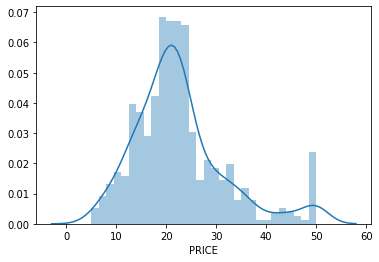

In [5]:
import seaborn as sns
sns.distplot(boston_df['PRICE'].dropna(), hist=True, kde=True, bins=30)

This histogram shows us the majority of home prices fell around the 18.5-21.5 range.

What about the mean for home prices?

In [6]:
price_mean = boston_df['PRICE'].mean()
print(f'The mean home price was: {price_mean}, in 1,000s USD.')

The mean home price was: 22.532806324110677, in 1,000s USD.


This value seems reasonable, because although it is a little outside where the majority of the values lie, it is still close - and there are still lots of prices on the high end.

But what is the mode of the price in the dataset?
And how many outliers for price do we have?

In [7]:
import numpy as np
from scipy import stats
# mode of the price
prices = np.array(boston_df['PRICE'])
price_mode = float(stats.mode(prices)[0])
print(f'The mode home price was: {price_mode}, in 1,000s USD.')

The mode home price was: 50.0, in 1,000s USD.


Definitely not a normal distribution, because mean != mode.

Any outliers for price?

In [8]:
def find_remove_outlier_iqr(values):
    '''Remove the outliers from the dataset of annual total nautral disasters.'''
    # calculate interquartile range
    q25, q75 = np.percentile(values, 25), np.percentile(values, 75)
    iqr = round(float(q75 - q25), 4)
    print(f'This is the IQR: {iqr}')
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in values if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in values if x > lower and x < upper]
    return outliers

prices_no_outliers = find_remove_outlier_iqr(prices)
print(f'Number of outliers removed from the data: {len(prices_no_outliers)}')

This is the IQR: 7.975
Number of outliers removed from the data: 40


#### To Remove or Not to Remove?
In this case, I think I will go ahead in training the model with the outliers included. At the end of the day, the presence of outliers isn't necessarily a bad thing - in this case an exceptionally priced home may indicate the same as an exceptionally performing athlete, or an unusually high-performing movie franchise. In other words, the outlier is a valid occurence, and we want to leave it in the dataset. For the same reason we're willing to pay so much more for exceptional products, or wait in line at highly anticipated Broadway shows, our linear regression model should be open to the possibility of predicting prices that befit highly valuable homes. 

# 3 - Correlation Between Predictors

## Heatmap

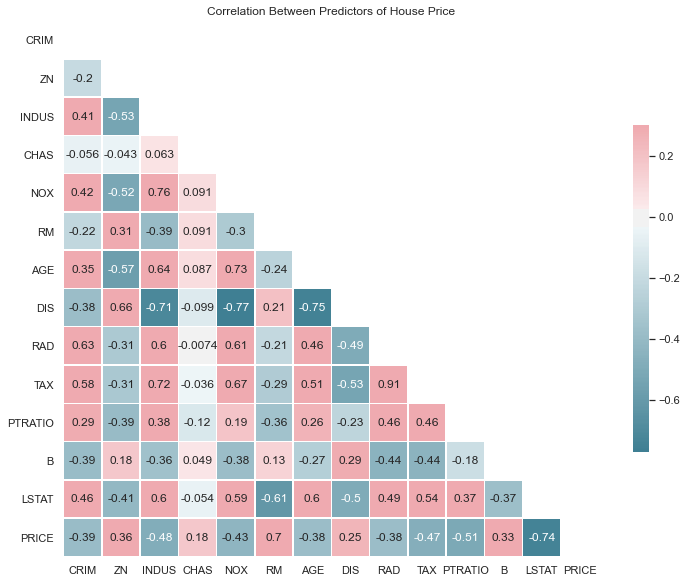

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def make_heatmap(df, map_title):
    """Plots the diagonal correlation matrix of a dataset using Seaborn.
       Credit to the Seaborn Documentation for inspiring this cell:
       https://seaborn.pydata.org/examples/many_pairwise_correlations.html
       
       Parameters:
       df(pandas.DataFrame): encapsulates the dataset being used to make heatmap.
       map_title(str): the title for the heatmap
    
    """
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 12))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.title(map_title)
    plt.show()
    
make_heatmap(boston_df, 'Correlation Between Predictors of House Price')

# 4 - Making the Model 

## Splitting Data
### Training: 75%
### Test: 25%

In [10]:
# setting predictor (X) and target (y) variables
X = boston_df[boston.feature_names]
y = boston.target
# splitting data using scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Instantiating + Fitting the Model on Training Data

In [11]:
from sklearn.linear_model import LinearRegression
import time

def time_fitting(fitter):
    '''Record and display the time taken to train the model.'''
    start = time.time()
    fitter()
    end = time.time()
    print(f'Fitting Time: {end-start} miliseconds')

def make_trained_model(X_train, y_train):
    """Return a Linear Regression model fitted to the training data. 
       Prints intercept and coefficients.
       
       Parameters:
       X_train(list): training data for features of dataset
       y_train(list): training data for target value

    """
    model = LinearRegression()
    # fit the model and time it
    time_fitting(lambda: model.fit(X_train, y_train))
    print()
    # print intercept and coefficients
    print(f'Y-intercept of Regression Line: {model.intercept_} \n')
    print(f'Weight values of Regression Line: \n{model.coef_}')
    return model

model = make_trained_model(X_train, y_train)

Fitting Time: 0.0012061595916748047 miliseconds

Y-intercept of Regression Line: 36.933255457118804 

Weight values of Regression Line: 
[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]


# 5 - Making Predictions

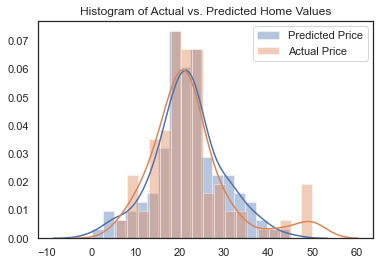

In [12]:
# store the prices predicted by the model, on the homes it has not yet seen before
def prediction_vs_actual(model, X_test, y_test):    
    y_pred = model.predict(X_test)
    sns.distplot(y_pred, hist=True, kde=True, bins=18, label='Predicted Price')
    sns.distplot(y_test, hist=True, kde=True, bins=18, label='Actual Price')
    plt.legend()
    plt.title('Histogram of Actual vs. Predicted Home Values')
    plt.show()
    return y_pred

y_pred = prediction_vs_actual(model, X_test, y_test)

# 6 - Evaluating and Improving the Model

## Mean Squared Error

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

29.782245092302336

## R^2 Score

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  # Value 0-1, with 1 being the best (yet possibly overfitted) value

0.6354638433202133

## Applying data normalization to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

### Standard Scaling

#### Scaling the Features

In [15]:
def scale_data(data, scaler):
    '''Scales the specified features of the dataset, using the scaler.'''
    boston_standardized_data = scaler.fit_transform(data)
    new_boston_df = pd.DataFrame(boston_standardized_data)
    new_boston_df.columns = boston.feature_names
    new_boston_df['PRICE'] = boston.target
    return new_boston_df

# import from sklearn
from sklearn.preprocessing import StandardScaler
# instantiate the scaler object
standard_scaler = StandardScaler()
# run through and scale each feature in the dataset
boston_standard_df = scale_data(boston.data, standard_scaler)
# Take another look at the data
boston_standard_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


#### Another Look at Correlations

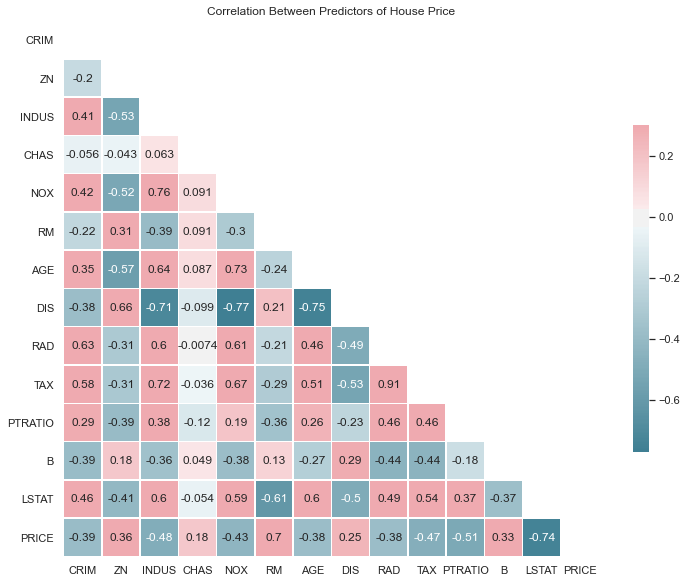

In [16]:
make_heatmap(boston_standard_df, 'Correlation Between Predictors of House Price')

#### Remaking the Model

In [17]:
# re-initializing inputs and output
X = boston_standard_df[boston.feature_names]
y = boston.target
# splitting data using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# creating a new instance of the Linear Regression model
model = make_trained_model(X_train, y_train)

Fitting Time: 0.0010921955108642578 miliseconds

Y-intercept of Regression Line: 22.408806103291376 

Weight values of Regression Line: 
[-1.01170421  1.02558108 -0.03953238  0.60731239 -1.80467996  2.64552328
 -0.19783648 -3.018615    2.0883816  -1.90212879 -2.13154559  0.77017134
 -3.56070005]


#### Making New Predictions

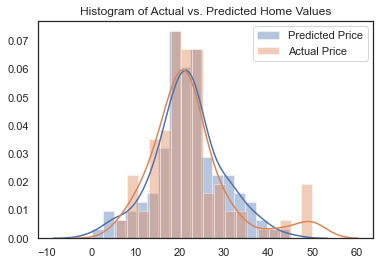

In [18]:
y_pred = prediction_vs_actual(model, X_test, y_test)

#### Recalculate Mean Squared Error and R^2

In [19]:
mean_squared_error(y_test, y_pred)

29.782245092302364

In [20]:
r2_score(y_test, y_pred)

0.6354638433202129

### Min Max Scaling

#### Scaling the Features

In [21]:
def scale_data(data, scaler):
    '''Scales the specified features of the dataset, using the scaler.'''
    boston_standardized_data = scaler.fit_transform(data)
    new_boston_df = pd.DataFrame(boston_standardized_data)
    new_boston_df.columns = boston.feature_names
    new_boston_df['PRICE'] = boston.target
    return new_boston_df

# import from sklearn
from sklearn.preprocessing import MinMaxScaler
# instantiate the scaler object
mm_scaler = MinMaxScaler()
# run through and scale each feature in the dataset
boston_mm_df = scale_data(boston.data, mm_scaler)
# Take another look at the data
boston_mm_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


#### Another Look at Correlations

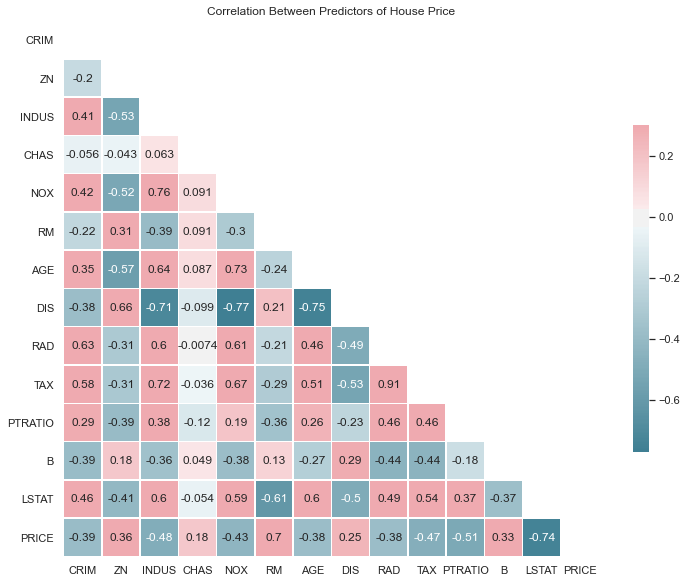

In [22]:
make_heatmap(boston_standard_df, 'Correlation Between Predictors of House Price')

#### Remaking the Model

In [23]:
# re-initializing inputs and output
X = boston_mm_df[boston.feature_names]
y = boston.target
# splitting data using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# creating a new instance of the Linear Regression model
model = make_trained_model(X_train, y_train)

Fitting Time: 0.0012788772583007812 miliseconds

Y-intercept of Regression Line: 27.5567269639864 

Weight values of Regression Line: 
[-10.47489456   4.40174969  -0.15735494   2.39341594  -7.57645867
  19.67024242  -0.68311581 -15.78007218   5.52186497  -5.91977522
  -9.26413928   3.34889385 -18.08799274]


#### Making New Predictions

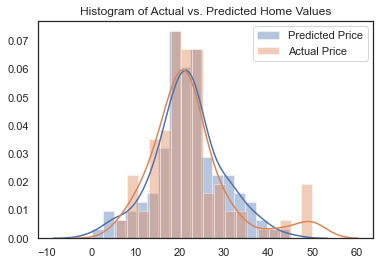

In [24]:
y_pred = prediction_vs_actual(model, X_test, y_test)

#### Recalculate Mean Squared Error and R^2

In [25]:
mean_squared_error(y_test, y_pred)

29.782245092302414

In [26]:
r2_score(y_test, y_pred)

0.6354638433202122

# 7 - Conclusion

There was no advantage in accuracy gained by training the Linear Regression model on scaled data, either by Standard Scaling nor by Min-Max Scaling. This may be due to the fact I scaled all the features together, in effect none of the correlations between the different variables changed. Therefore the same regression was formed, in turn leading to the same MSE and r^2 values returned for its predictions on the testing data.

However, there was a noticeably faster time spent fitting the Linear Regression model when Standard Scaling was used, and more so when Min Max Scaling was used, as opposed to when no data normalization was utilized.